### Importing Packages

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Create stae space and intial state transition probabilities

Imagine you have a lazy friend so we define the state space as sleeping, eating, or mobile. We will set the initial probabilities to 35%, 35%, and 30% respectively.

In [11]:
states=["Eating","Sleeping","Mobile","Reading","football"]
probin=[0.25,0.25,.30,.10,0.10]
state_space=pd.Series(probin,index=states)
print(state_space)
print(state_space.sum())

Eating      0.25
Sleeping    0.25
Mobile      0.30
Reading     0.10
football    0.10
dtype: float64
1.0


### Creating Transition Probabilities

In [13]:
q_df=pd.DataFrame(columns=states,index=states)
q_df.loc[states[0]]=[0.3,0.1,0.1,0.1,0.4]
q_df.loc[states[1]]=[0.35,0.1,0.35,0.1,0.1]
q_df.loc[states[2]]=[0.35,0.1,0.15,0.3,0.1]
q_df.loc[states[3]]=[0.25,0.2,0.15,0.3,0.1]
q_df.loc[states[4]]=[0.15,0.3,0.15,0.3,0.1]

q_df

,Eating,Sleeping,Mobile,Reading,football
Eating,0.3,0.1,0.1,0.1,0.4
Sleeping,0.35,0.1,0.35,0.1,0.1
Mobile,0.35,0.1,0.15,0.3,0.1
Reading,0.25,0.2,0.15,0.3,0.1
football,0.15,0.3,0.15,0.3,0.1


In [14]:
q = q_df.values
print('\n', q,"\n", q.shape, '\n')
print(q_df.sum(axis=1))


 [[0.3 0.1 0.1 0.1 0.4]
 [0.35 0.1 0.35 0.1 0.1]
 [0.35 0.1 0.15 0.3 0.1]
 [0.25 0.2 0.15 0.3 0.1]
 [0.15 0.3 0.15 0.3 0.1]] 
 (5, 5) 

Eating      1.0
Sleeping    1.0
Mobile      1.0
Reading     1.0
football    1.0
dtype: float64


### Creating Markov Diagram using networkx package

Possible state=nodes & Edges=Transition Probabilities

In [15]:
def get_markov_edges(q):
    edges={}
    for i in q.columns:
        for j in q.index:
            edges[(j,i)] = q.loc[j,i]
    return edges
edges_wts=get_markov_edges(q_df)
print(edges_wts)
            

{('Eating', 'Eating'): 0.3, ('Sleeping', 'Eating'): 0.35, ('Mobile', 'Eating'): 0.35, ('Reading', 'Eating'): 0.25, ('football', 'Eating'): 0.15, ('Eating', 'Sleeping'): 0.1, ('Sleeping', 'Sleeping'): 0.1, ('Mobile', 'Sleeping'): 0.1, ('Reading', 'Sleeping'): 0.2, ('football', 'Sleeping'): 0.3, ('Eating', 'Mobile'): 0.1, ('Sleeping', 'Mobile'): 0.35, ('Mobile', 'Mobile'): 0.15, ('Reading', 'Mobile'): 0.15, ('football', 'Mobile'): 0.15, ('Eating', 'Reading'): 0.1, ('Sleeping', 'Reading'): 0.1, ('Mobile', 'Reading'): 0.3, ('Reading', 'Reading'): 0.3, ('football', 'Reading'): 0.3, ('Eating', 'football'): 0.4, ('Sleeping', 'football'): 0.1, ('Mobile', 'football'): 0.1, ('Reading', 'football'): 0.1, ('football', 'football'): 0.1}


### Visualizing

In [16]:
from pprint import pprint

In [17]:
G = nx.MultiDiGraph() #Creating graph object

# Nodes correspond to state
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')



Nodes:
['Eating', 'Sleeping', 'Mobile', 'Reading', 'football']



Edges:
OutMultiEdgeDataView([('Eating', 'Eating', {'weight': 0.3, 'label': 0.3}), ('Eating', 'Sleeping', {'weight': 0.1, 'label': 0.1}), ('Eating', 'Mobile', {'weight': 0.1, 'label': 0.1}), ('Eating', 'Reading', {'weight': 0.1, 'label': 0.1}), ('Eating', 'football', {'weight': 0.4, 'label': 0.4}), ('Sleeping', 'Eating', {'weight': 0.35, 'label': 0.35}), ('Sleeping', 'Sleeping', {'weight': 0.1, 'label': 0.1}), ('Sleeping', 'Mobile', {'weight': 0.35, 'label': 0.35}), ('Sleeping', 'Reading', {'weight': 0.1, 'label': 0.1}), ('Sleeping', 'football', {'weight': 0.1, 'label': 0.1}), ('Mobile', 'Eating', {'weight': 0.35, 'label': 0.35}), ('Mobile', 'Sleeping', {'weight': 0.1, 'label': 0.1}), ('Mobile', 'Mobile', {'weight': 0.15, 'label': 0.15}), ('Mobile', 'Reading', {'weight': 0.3, 'label': 0.3}), ('Mobile', 'football', {'weight': 0.1, 'label': 0.1}), ('Reading', 'Eating', {'weight': 0.25, 'label': 0.25}), ('Reading', 'Sleeping', {'weight': 0.2, 'label': 0.2}), ('Reading', 'Mobile', {'weight'

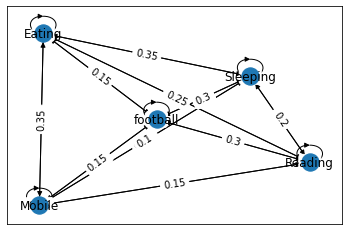

In [18]:
# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')